# 👩‍💻Remote Work Health Impact Survey 2025

### Description :-A global dataset analyzing how remote, hybrid, and onsite work affect employee mental and physical health, work-life balance, burnout, social isolation, and salary trends across roles, industries, and demographics.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


## Load the DataSet

In [2]:
df=pd.read_csv('post_pandemic_remote_work_health_impact_2025.csv')
df


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,NaN,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


## Analyzing the Dataset

### The dataset contains 14 columns capturing various aspects of employee well-being and work conditions. Here's a quick overview of key considerations:
### `Survey_Date`:-Object type data , no issues
### `Age`:-Integer type data , no issues
### `Gender `, `Region`, `Industry`, `Job_Role ` , `Work_Arrangement` :-Object type data , no issues
### `Hours_Per_Week` :- Integer type data , no issues
### `Mental_Health_Status` :- Having null values needs preprocessing 
### `Burnout_Level` :- Object type data , no issues
### `Work_Life_Balance_Score` :- Interger type data , no issues
### `Physical_Health_Issues` :-  Having null values needs preprocessing 
### `Social_Isolation_Score` :- Have some outliers needs to be handle 
### `Salary_Range` :-  Object type data , needs standardization 




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [4]:
df.shape

(3157, 14)

In [5]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [6]:
df.tail()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,NaN,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K
3156,2025-06-26,54,Female,North America,Healthcare,Technical Writer,Onsite,39,Burnout,Medium,4,Back Pain; Eye Strain,2,$100K-120K


In [7]:
df.isnull().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(1079)

In [9]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


###  Numerical Columns in the Dataset

In [10]:
numerical_cols = df.select_dtypes(include="number").columns
print("Numerical Columns:", numerical_cols.tolist())
 

Numerical Columns: ['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score']


###  Categorical Columns in the Dataset

In [11]:
categorical_cols = df.select_dtypes(include="object").columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Survey_Date', 'Gender', 'Region', 'Industry', 'Job_Role', 'Work_Arrangement', 'Mental_Health_Status', 'Burnout_Level', 'Physical_Health_Issues', 'Salary_Range']


### Filling null values 

In [12]:
most_occuring_value=df['Mental_Health_Status'].value_counts()
most_occuring_value

Mental_Health_Status
PTSD               423
Anxiety            394
Burnout            392
Depression         386
ADHD               385
Stress Disorder    378
Name: count, dtype: int64

In [13]:
##Categorical Data: Mental_Health_Status 

df['Mental_Health_Status'].mode()[0]

'PTSD'

In [14]:
#Fill Mental_Health_Status (Categorical) with Mode

df.fillna({'Mental_Health_Status':df['Mental_Health_Status'].mode()[0]}, inplace=True)
df

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,Medium,5,NaN,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,PTSD,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


In [15]:
df.Physical_Health_Issues.unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [16]:
most_occuring_value=df['Physical_Health_Issues'].value_counts()
most_occuring_value


Physical_Health_Issues
Shoulder Pain; Eye Strain                                      262
Back Pain; Eye Strain                                          258
Eye Strain                                                     256
Back Pain; Shoulder Pain; Eye Strain                           255
Back Pain                                                      253
Shoulder Pain                                                  235
Back Pain; Shoulder Pain                                       218
Back Pain; Eye Strain; Neck Pain                                93
Neck Pain                                                       92
Eye Strain; Neck Pain                                           90
Back Pain; Shoulder Pain; Eye Strain; Neck Pain                 88
Back Pain; Neck Pain                                            88
Shoulder Pain; Neck Pain                                        78
Shoulder Pain; Eye Strain; Neck Pain                            76
Back Pain; Shoulder Pain; Neck Pain    

In [17]:
##Categorical Data:Mental_Health_Status 

df['Physical_Health_Issues'].mode()[0]

'Shoulder Pain; Eye Strain'

In [18]:
#Fill Physical_Health_Issues (Categorical) with Mode

df.fillna({'Physical_Health_Issues':df['Physical_Health_Issues'].mode()[0]}, inplace=True)
df

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,Medium,5,Shoulder Pain; Eye Strain,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,PTSD,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


In [19]:
df.isnull().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

# Visualization

#### Showing Outliers of Column Social Isolation vs Work Arragement 

In [20]:
fig=px.box(df,x='Work_Arrangement',y='Social_Isolation_Score',color='Work_Arrangement',
           title='Work Arrangement vs Social_Isolation_Score ')
fig.update_layout(title_x=0.5)
fig.show()

#### Work Arrangement vs Social Isolation Score

### After Removing the Outliers using IQR method 


In [21]:
q1=df['Social_Isolation_Score'].quantile(0.25)
q3=df['Social_Isolation_Score'].quantile(0.75)
iqr=q3-q1
min_r = q1-(1.5*iqr)
max_r = q3+(1.5 * iqr)
print("Lower Limit ",min_r)
print("Upper Limit ",max_r)
df_clean = df[(df['Social_Isolation_Score'] >= min_r) & (df['Social_Isolation_Score'] <= max_r)]

#Plot cleaned data
fig = px.box(df_clean,x='Work_Arrangement',y='Social_Isolation_Score', color='Work_Arrangement', 
               title='Work Arrangement vs Social Isolation Score (Cleaned Data) ', points='all')

fig.update_layout(
    title_x=0.5,
    xaxis_title='Work Arrangement',
    yaxis_title='Social Isolation Score'
)

fig.show()

Lower Limit  -1.0
Upper Limit  7.0


#### `Insights` :- Remote Workers May Feel More Isolated the median Social Isolation Score for Remote work is higher than Hybrid or In-Office, it suggests that working remotely contributes to greater feelings of isolation.

### Gender vs Mental Health Distribution 
#### `Insights`:-Identify gender-based trends in mental health(e.g. who reports more anxiety,depression,PTSD(Post traumatic stress disorder),
####                                                           ADHD(Attention deficit hyperactivity disorder)).

In [22]:
df_gender_mental_health = df.groupby(['Mental_Health_Status', 'Gender']).size().reset_index(name='Count')
df_gender_mental_health 

,Mental_Health_Status,Gender,Count
0,ADHD,Female,199
1,ADHD,Male,177
2,ADHD,Non-binary,6
3,ADHD,Prefer not to say,3
4,Anxiety,Female,197
5,Anxiety,Male,177
6,Anxiety,Non-binary,18
7,Anxiety,Prefer not to say,2
8,Burnout,Female,184
9,Burnout,Male,189


In [23]:
fig = px.bar(df_gender_mental_health,x='Mental_Health_Status',y ='Count',color='Gender',barmode='group',
             title='Gender vs Mental Health Status Distribution')

fig.update_layout( title_x=0.5)
    
fig.show()


### Age vs Social Isolation Score
#### `Insights` :- Which Age group feel more isolated 


In [24]:
age_isolation=df.groupby('Age')['Social_Isolation_Score'].mean().reset_index()
age_isolation

,Age,Social_Isolation_Score
0,22,2.486111
1,23,2.848485
2,24,2.780488
3,25,2.716667
4,26,2.720588
5,27,2.530120
6,28,2.775862
7,29,2.500000
8,30,2.666667
9,31,2.750000


In [25]:
fig = px.line(age_isolation,x='Age',y='Social_Isolation_Score',title='Age vs Social Isolation_Score',markers=True)
fig.update_layout(title_x=0.5, xaxis_title='Age', yaxis_title='Average Social Isolation Score')
fig.show()
 

### Job Role vs Burnout Level 
#### `Insights` :-Which job roles experience higher burnout ?

In [26]:
df_count=df.groupby(['Job_Role','Burnout_Level']).size().reset_index(name='Count')
df_count

,Job_Role,Burnout_Level,Count
0,Account Manager,High,31
1,Account Manager,Low,43
2,Account Manager,Medium,58
3,Business Analyst,High,47
4,Business Analyst,Low,27
...,...,...,...
67,Technical Writer,Low,28
68,Technical Writer,Medium,50
69,UX Designer,High,44
70,UX Designer,Low,37


In [27]:
fig = px.line( df_count, x='Job_Role',y='Count',color='Burnout_Level',  markers=True,          
    title='Grouped Line Chart: Job Role vs Burnout Level')

fig.update_layout(
    title_x=0.5,
    xaxis_tickangle=-45
)

fig.show()


### Industry vs Mental Health Status 
#### `Insights`:- Metal health trend vary by Industry eg  PTSD is the most commonly reported mental health issue across nearly all industries

In [28]:
industry_mental_health = df.groupby(['Industry', 'Mental_Health_Status']).size().reset_index(name='Count')
industry_mental_health

,Industry,Mental_Health_Status,Count
0,Customer Service,ADHD,26
1,Customer Service,Anxiety,21
2,Customer Service,Burnout,20
3,Customer Service,Depression,21
4,Customer Service,PTSD,62
5,Customer Service,Stress Disorder,23
6,Education,ADHD,33
7,Education,Anxiety,35
8,Education,Burnout,37
9,Education,Depression,35


In [29]:
fig = px.sunburst(industry_mental_health,path=['Industry', 'Mental_Health_Status'],  values='Count',
    title=' Industry-wise Mental Health Status',
    width=1200,     
    height=900
)

fig.update_traces(textinfo='label+percent entry+value')  
fig.update_layout(title_x=0.5)
fig.show()


### Region vs Burnout Level
#### `Insights `:- Geographical Stress patterns .

In [30]:
###Thik Krna aa 
region_burnout = df.groupby(['Region', 'Burnout_Level']).size().reset_index(name='Count')
region_burnout



,Region,Burnout_Level,Count
0,Africa,High,166
1,Africa,Low,128
2,Africa,Medium,238
3,Asia,High,176
4,Asia,Low,110
5,Asia,Medium,231
6,Europe,High,169
7,Europe,Low,132
8,Europe,Medium,212
9,North America,High,158


In [31]:
fig = px.funnel(region_burnout, x='Count',y='Region', color='Burnout_Level',
                title='Funnel Chart: Region-wise Distribution by Burnout Level')

fig.update_layout(title_x=0.5)
fig.show()



### Physical Health Issues Vs Work Arrangement 
#### `Insights`:- which work style causes more physical strain (eye strain, back pain).

In [32]:
df_exploded = df.assign(Physical_Issue_Split=df['Physical_Health_Issues'].str.split('; ')).explode('Physical_Issue_Split')
df_exploded

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Issue_Split
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,Shoulder Pain
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,Neck Pain
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,Back Pain
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,Shoulder Pain
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,Eye Strain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K,Shoulder Pain
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K,Eye Strain
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K,Neck Pain
3156,2025-06-26,54,Female,North America,Healthcare,Technical Writer,Onsite,39,Burnout,Medium,4,Back Pain; Eye Strain,2,$100K-120K,Back Pain


In [33]:
grouped = df_exploded.groupby(['Physical_Issue_Split', 'Work_Arrangement']).size().reset_index(name='Count')
grouped

,Physical_Issue_Split,Work_Arrangement,Count
0,Back Pain,Hybrid,488
1,Back Pain,Onsite,778
2,Back Pain,Remote,297
3,Eye Strain,Hybrid,603
4,Eye Strain,Onsite,935
5,Eye Strain,Remote,346
6,Neck Pain,Hybrid,229
7,Neck Pain,Onsite,398
8,Neck Pain,Remote,171
9,Shoulder Pain,Hybrid,588


In [34]:
fig = px.treemap(grouped,path=['Work_Arrangement','Physical_Issue_Split'],values='Count',
             title='Physical Health Issues Across Work Arrangements')

fig.update_layout(title_x=0.5)
fig.show()


### Physical Health Issues vs Mental Health Status
#### `Insights`:- Correlation between physical and metal health .

In [35]:
grouped = df_exploded.groupby(['Physical_Issue_Split', 'Mental_Health_Status']).size().reset_index(name='Count')
grouped

,Physical_Issue_Split,Mental_Health_Status,Count
0,Back Pain,ADHD,195
1,Back Pain,Anxiety,186
2,Back Pain,Burnout,191
3,Back Pain,Depression,195
4,Back Pain,PTSD,617
5,Back Pain,Stress Disorder,179
6,Eye Strain,ADHD,222
7,Eye Strain,Anxiety,244
8,Eye Strain,Burnout,241
9,Eye Strain,Depression,227


In [36]:
fig = px.bar(grouped, x='Physical_Issue_Split',y='Count',color='Mental_Health_Status',title='Individual Physical Health Issues vs Mental Health',
             barmode='stack')
fig.update_layout(title_x=0.5, xaxis_title='Physical Issue', yaxis_title='Count')
fig.show()


### Work Arrangement Vs Burnout Level 
#### `Insights` :- Remote workers face the highest burnout levels , while hybrid work offers the most balanced stress levels due to its flexibility.




In [37]:
grouped = df.groupby(['Work_Arrangement', 'Burnout_Level']).size().reset_index(name='Count')
grouped

,Work_Arrangement,Burnout_Level,Count
0,Hybrid,High,360
1,Hybrid,Low,193
2,Hybrid,Medium,454
3,Onsite,High,413
4,Onsite,Low,471
5,Onsite,Medium,678
6,Remote,High,273
7,Remote,Low,81
8,Remote,Medium,234


In [38]:
fig=px.pie(grouped,'Burnout_Level', values='Count',facet_col='Work_Arrangement',color='Burnout_Level',
           title='Work Arrangement vs Burnout Level'
          )
fig.update_layout(title_x=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

### Correlation Heatmap of Numerical Feature
#### `Insights`:-Burnout correlates strongly with long hours and poor work-life balance, reflecting deep links between workload, physical, and mental well-being.This visualization helps identify any strong linear relationships that could be useful for predictive modeling or further analysis.


In [39]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data



,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
0,27,64,3,2
1,37,37,4,2
2,32,36,3,2
3,40,63,1,2
4,30,65,5,4
...,...,...,...,...
3152,62,38,4,3
3153,24,54,4,4
3154,45,59,1,3
3155,38,52,3,5


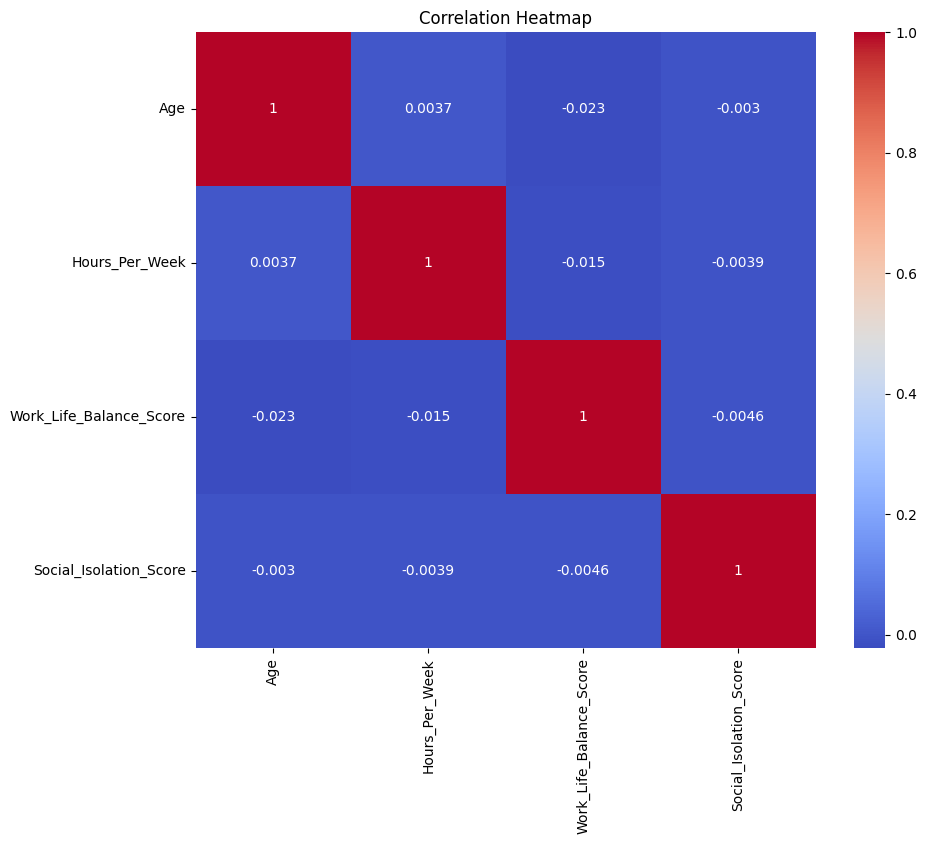

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
### Salary Range Vs Work Life Balance Score

In [53]:
salary_order = [
    "$40K-60K",
    "$60K-80K",
    "$80K-100K",
    "$100K-120K",
    "$120K+"
]


In [62]:
df['Salary_Range'] = pd.Categorical(df['Salary_Range'], categories=salary_order, ordered=True)


In [63]:
print(df['Salary_Range'].unique())


['$40K-60K', '$80K-100K', '$60K-80K', '$100K-120K', '$120K+']
Categories (5, object): ['$40K-60K' < '$60K-80K' < '$80K-100K' < '$100K-120K' < '$120K+']


In [64]:
df['Salary_Range'] = df['Salary_Range'].str.replace('–', '-', regex=False)  # Replace en-dash
df['Salary_Range'] = df['Salary_Range'].str.replace(' ', '')                # Remove spaces


In [65]:
df['Salary_Range'] = pd.Categorical(df['Salary_Range'], categories=salary_order, ordered=True)

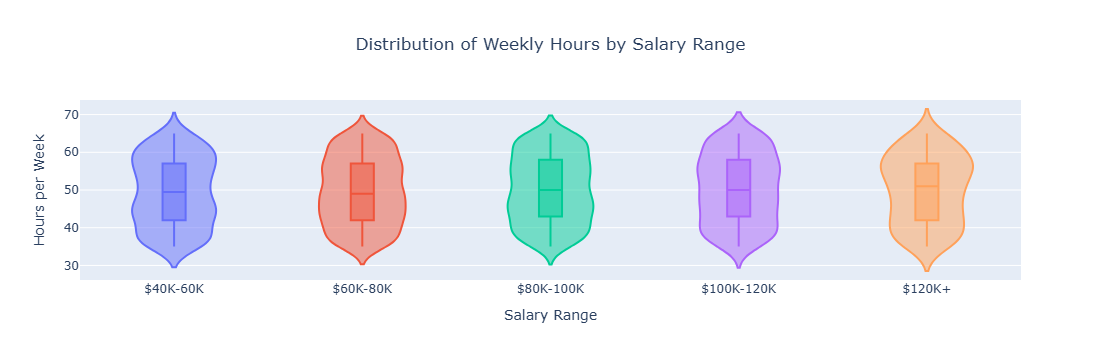

In [67]:
fig = px.violin(
   df,
    x='Salary_Range',
    y='Hours_Per_Week',
    color='Salary_Range',
    box=True,
    category_orders={"Salary_Range": salary_order},
   
    title='Distribution of Weekly Hours by Salary Range'
)

fig.update_layout(
    xaxis_title='Salary Range',
    yaxis_title='Hours per Week',
    showlegend=False,
    title_x=0.5
)

fig.show()

